# Homework exercise 2
## Deadline: upload to Moodle by 22 March 18:00 h

__Suggestion: take this notebook and simply add your code and explanations.__

If you prefer to use .py files, you are expected to also include a PDF containing the output of your code and your explanations. Still, the code needs to be in a form that can be easily run on another computer.

__Name 1:__Julia Ornatowski

__Name 2:__Dmytro Tomov

__Name 3:__Evamaria Hammerschmid


The name of the file that you upload should be named *Homework2_YourLastName_YourStudentID*.

Reminder: you are required to attend class on 23 March to earn points for this homework exercise unless you have a valid reason for your absence.

You are allowed to work on this exercise in groups of up to three students. If any part of the questions is unclear, please ask on the Moodle forum.

#### Rebalancing portfolios
In this exercise, you are asked to look at the effects of periodically rebalancing portfolios. We define rebalancing here to mean an adjustment to the portfolio weights back to their target weights after differences in returns achieved by different assets have led to deviations from those weights. In the example studied in this problem set, the target portfolio will be equal-weighted, i.e., the target weight of each asset in a portfolio consisting of $N$ assets will be $\frac{1}{N}$.

**1\.** To prepare the subsequent analyses, please create simulated returns as follows. There are 100 assets and 10000 (corresponding to about 40 years) logarithmic daily returns for each of these assets. Returns follow a multivariate normal distribution with expected log returns of 0.05% and a daily standard deviation of log returns of 2% (which is similar to historical real stock returns; thus we will henceforth refer to the assets as stocks). We will assume that pairwise correlations of returns between different stocks are identical for all pairs of stocks. Please create one numpy array each for pairwise correlations equal to 0.5 and 0. In subsequent questions, you are expected to always use each of these arrays, which allows you to compare results later.

In [2]:
import pandas as pd
import numpy as np

corr0=np.identity(100)
corr05=np.full((100,100),0.5)\
    +0.5*np.identity(100)

days=10000
std=0.02
expr=0.0005
mean=[0] * 100
np.array(mean)
returns0 = np.random.multivariate_normal(np.array(mean),corr0,days) * std + expr
returns0

returns05 = np.random.multivariate_normal(np.array(mean),corr05,days) * std + expr

#we created date frames so that we can easily take a sample out of the data
df1 = pd.DataFrame(returns0)
print("Log returns with correlation 0: \n", df1)

df2 =pd.DataFrame(returns05)
print("Log returns with correlation 0.5: \n ", df2)




Log returns with correlation 0: 
             0         1         2         3         4         5         6   \
0    -0.006119 -0.028757  0.000436  0.062025 -0.010631 -0.037371 -0.028221   
1    -0.021783  0.029587 -0.006459  0.002683  0.010009  0.001037  0.016748   
2     0.044582 -0.023902  0.014411  0.024647 -0.005270 -0.001302 -0.049301   
3    -0.007029 -0.007663 -0.008959 -0.001675  0.037487 -0.003101 -0.023579   
4    -0.012990  0.007367  0.000784 -0.006312 -0.014598  0.063115  0.003292   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.004756 -0.012711 -0.000147 -0.005908 -0.010274 -0.030636  0.043136   
9996 -0.032132  0.000123 -0.018990 -0.023621 -0.000958 -0.014321  0.033969   
9997 -0.039087  0.008747 -0.002291  0.001233  0.021120  0.014959  0.009427   
9998  0.017427 -0.019427  0.007483 -0.009883 -0.020825 -0.013649 -0.009042   
9999 -0.021370 -0.036083  0.023341 -0.016296 -0.014701 -0.004351  0.016344   

            7         8      

**2\.** For each of these arrays, plot the return time series generate above for five stocks randomly chosen among the 100 stocks contained in the array.

In [3]:
#taking samples out of our arrays
%matplotlib inline
import matplotlib.pyplot as plt
df1_returns= df1.sample(n=5,axis='columns')
print(df1_returns)
df2_returns= df2.sample(n=5,axis='columns')
print(df2_returns)

            84        38        70        49        41
0    -0.015976 -0.007296  0.002663  0.002945 -0.006816
1    -0.017013  0.003842  0.003736  0.008015 -0.006120
2    -0.004401 -0.003935 -0.040730  0.027255  0.035025
3     0.034703 -0.023301 -0.025801  0.019373 -0.003008
4     0.001351  0.034841 -0.009932  0.019785  0.002713
...        ...       ...       ...       ...       ...
9995 -0.013016 -0.025962 -0.020284 -0.008175  0.014569
9996 -0.004639 -0.023297  0.050747 -0.018112  0.016411
9997 -0.004141  0.016642  0.004969  0.006601  0.014733
9998 -0.006573  0.025046 -0.009847 -0.018292 -0.016036
9999 -0.018997 -0.003890 -0.037104 -0.000788  0.019908

[10000 rows x 5 columns]
            77        69        16        92        39
0     0.020427 -0.005770  0.026467  0.006155  0.019335
1     0.002631 -0.015132 -0.029987 -0.002111 -0.032399
2     0.007782  0.010053 -0.000649  0.026371 -0.002298
3     0.009413  0.022438  0.042929  0.011347  0.027740
4    -0.006170  0.002744  0.027362 -0.0

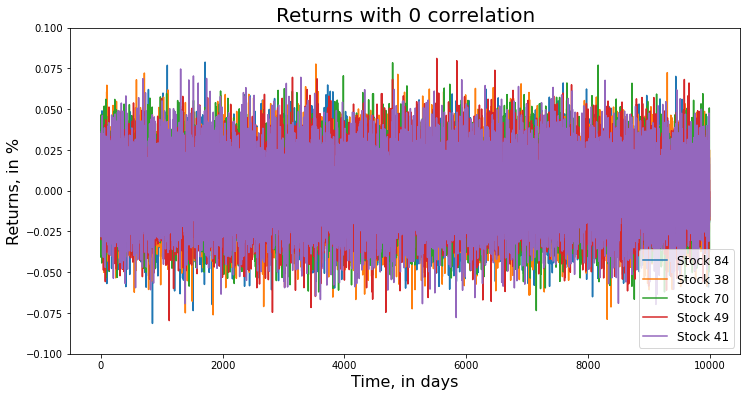

In [4]:
plt.figure(figsize=(12,6))
plt.ylim((-0.1, 0.1))
graph = plt.plot(df1_returns)
labels = ["Stock {}".format(stock) for stock in list(df1_returns)]
plt.legend(graph, labels, fontsize = 12)
plt.xlabel('Time, in days', fontsize=16)
plt.ylabel('Returns, in %', fontsize=16) 
plt.title('Returns with 0 correlation', fontsize=20);

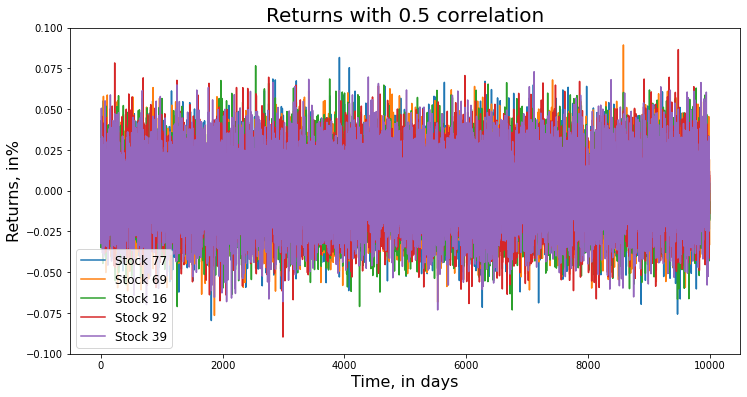

In [5]:
plt.figure(figsize=(12,6))
plt.ylim((-0.1, 0.1))
graph = plt.plot(df2_returns)
labels = ["Stock {}".format(stock) for stock in list(df2_returns)]
plt.legend(graph, labels, fontsize = 12)
plt.xlabel('Time, in days', fontsize=16)
plt.ylabel('Returns, in%', fontsize=16) 
plt.title('Returns with 0.5 correlation', fontsize=20);

**3.** Compute the cumulative returns for each array and plot cumulative returns for the same stocks as in the previous question.

In [6]:
cumul_returns0 = np.cumsum(df1, axis = 0)
cumul_returns05 = np.cumsum(df2, axis = 0)

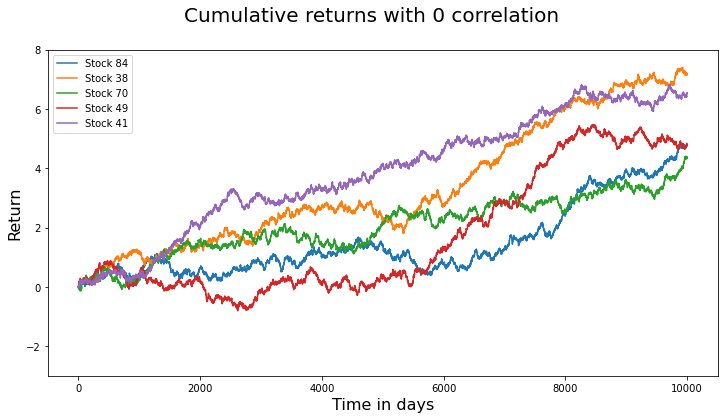

In [7]:
plt.figure(figsize=(12,6))
plt.ylim((-3, 8))
graph = plt.plot(np.cumsum(df1_returns, axis = 0))
labels =  [ "Stock {}".format(stock) for stock in list(df1_returns)]
plt.legend(graph, labels, fontsize = 10)
plt.xlabel('Time in days', fontsize=16)
plt.ylabel('Return', fontsize=16) 
plt.suptitle('Cumulative returns with 0 correlation', fontsize=20);

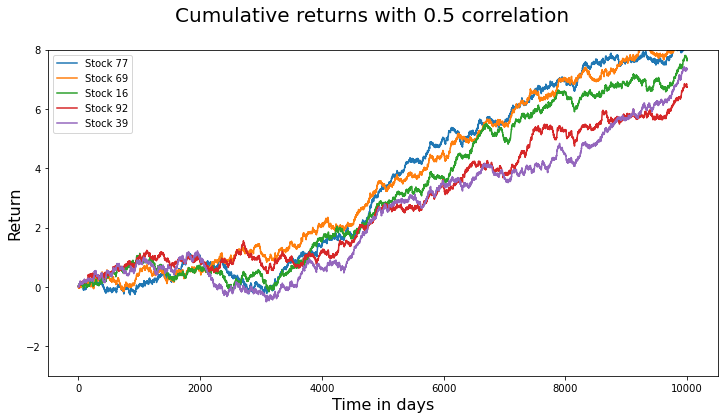

In [8]:
plt.figure(figsize=(12,6))
plt.ylim((-3, 8))
graph = plt.plot(np.cumsum(df2_returns, axis = 0))
labels =  [ "Stock {}".format(stock) for stock in list(df2_returns)]
plt.legend(graph, labels, fontsize = 10)
plt.xlabel('Time in days', fontsize=16)
plt.ylabel('Return', fontsize=16) 
plt.suptitle('Cumulative returns with 0.5 correlation', fontsize=20);

**4\.** As a benchmark compared to the rebalanced portfolios considered afterwards, consider buy and hold portfolios investing equal amounts in each asset at the beginning and never adjusting the portfolio. To be able to understand the effect of diversification on the potential benefits of rebalancing, you are asked to consider portfolios comprising 2 and 10 stocks, respectively. For each of those two cases,

* create 100 portfolios of stocks randomly chosen among those contained in the respective array
* for each portfolio, compute the average log return
* assume you invest €1,000,000 in each portfolio. Compute the final values, the mean and the standard deviation of the final values

In [12]:
#by returns we always mean log returns in this case
final_values_pf = []
#funcion call with the amount of stocks in the portfolio and df depending on corr-factor
def portfolio_returns(n_stock,df): 
    final_portfolio_returns = []
    for i in range(100):
        returns = df.sample(n=n_stock,axis='columns') #taking a sample of either 2 or 10 stocks
        final_returns=np.sum(returns,axis=0) #final log returns can by calculated by simply suming them up
        final_portfolio_return=0
        for x in final_returns:
            final_portfolio_return +=np.exp(x) 
        final_portfolio_return=np.log(final_portfolio_return/n_stock)
        final_portfolio_returns.append(final_portfolio_return)
    return final_portfolio_returns

for nStocks in [2,10]:#code for going through all cases in one go
    for corr in [0, 0.5]:
        if corr == 0:
            df = df1
        elif corr == 0.5:
            df = df2
        result = portfolio_returns(nStocks,df)
        final_values = np.exp(result)*1000000 
        final_values_pf.append(final_values)
        print("Average Log Return for 100 Portfolios, nStocks = {} and corr = {}: {}".format(nStocks, corr, np.mean(result)))
        print("Mean final value:  {}, Standard Deviation: {}".format(np.mean(final_values), np.std(final_values)))
        #print("Final values of 100 portfolios, nStocks = {} and corr = {}: \n {}".format(nStocks, corr, sum(final_values_pf)))
        print("\n")

Average Log Return for 100 Portfolios, nStocks = 2 and corr = 0: 5.512052709122379
Mean final value:  632528695.4711404, Standard Deviation: 928703130.4328357


Average Log Return for 100 Portfolios, nStocks = 2 and corr = 0.5: 8.285768655737753
Mean final value:  8088184279.043877, Standard Deviation: 11014587411.399292


Average Log Return for 100 Portfolios, nStocks = 10 and corr = 0: 6.152523030326038
Mean final value:  565691213.1707604, Standard Deviation: 344287781.8026493


Average Log Return for 100 Portfolios, nStocks = 10 and corr = 0.5: 8.689575231142301
Mean final value:  7183929781.427014, Standard Deviation: 4084795748.743281




**5\.** Consider the same initial portfolios as in the previous question. However, instead of leaving the portfolio unchanged, assume the portfolio is rebalanced either
* every day
* or every 100 days

For these two cases, again
* for each portfolio, compute the average log return
* assume you invest €1000000 in each portfolio. Compute the final values, the mean and the standard deviation of the final values


In [10]:
#by returns we mean actual returns, log returns are named specifically
def portfolio_returns_rebalance(n_stock,df,rebalance):
    final_portfolio_log_returns = []
    for i in range(100):
        returns = np.exp(df.sample(n=n_stock,axis='columns')).to_numpy() 
        final_returns = np.ones((n_stock,))
        for j in range(len(returns)):
            final_returns *= returns[j]
            if (j+1) % rebalance ==0: #modulo function of either rebalancing every or every 100 days
                final_returns.fill(np.mean(final_returns))
        final_portfolio_return=np.mean(final_returns)
        final_portfolio_log_return=np.log(final_portfolio_return)
        final_portfolio_log_returns.append(final_portfolio_log_return)
    return final_portfolio_log_returns

#code for going through all cases in one go, this time also considering if we balance every or every 100 days
for rebalance in [1,100]: #code for going through all cases in one go, this time also considering if we balance every or every 100 days
    for nStocks in [2,10]:
        for corr in [0, 0.5]:
            if corr == 0:
                df = df1
            elif corr == 0.5:
                df = df2
            result = portfolio_returns_rebalance(nStocks,df,rebalance)
            final_values = np.exp(result)*1000000 
            final_values_pf.append(final_values)
            print("Average Log Return for 100 Portfolios, nStocks = {} and corr = {} and rebalance after {} day(s): {}".format(nStocks, corr, rebalance , np.mean(result)))
            print("Mean final value:  {}, Standard Deviation: {}".format(np.mean(final_values), np.std(final_values)))
            #print("Final valunes of 100 rebalanced portfolios, nStocks = {} and corr = {}: \n {}".format(nStocks, corr, sum(final_values_pf)))
            print("\n")


Average Log Return for 100 Portfolios, nStocks = 2 and corr = 0 and rebalance after 1 day(s): 5.845144359571339
Mean final value:  778644123.5867482, Standard Deviation: 1687610890.451548


Average Log Return for 100 Portfolios, nStocks = 2 and corr = 0.5 and rebalance after 1 day(s): 8.200659157309683
Mean final value:  6224935092.8992195, Standard Deviation: 8953984398.685966


Average Log Return for 100 Portfolios, nStocks = 10 and corr = 0 and rebalance after 1 day(s): 6.597618961299347
Mean final value:  830766406.6257524, Standard Deviation: 411888993.9842326


Average Log Return for 100 Portfolios, nStocks = 10 and corr = 0.5 and rebalance after 1 day(s): 8.659400161129337
Mean final value:  6263530898.622964, Standard Deviation: 2699941627.925434


Average Log Return for 100 Portfolios, nStocks = 2 and corr = 0 and rebalance after 100 day(s): 5.789990852590904
Mean final value:  629692900.0214651, Standard Deviation: 790091076.8151592


Average Log Return for 100 Portfolios, nS

**6\.** Plot the distributions of final values computed in 4. and 5.

Text(0.5, 0.98, 'Distribution of final values')

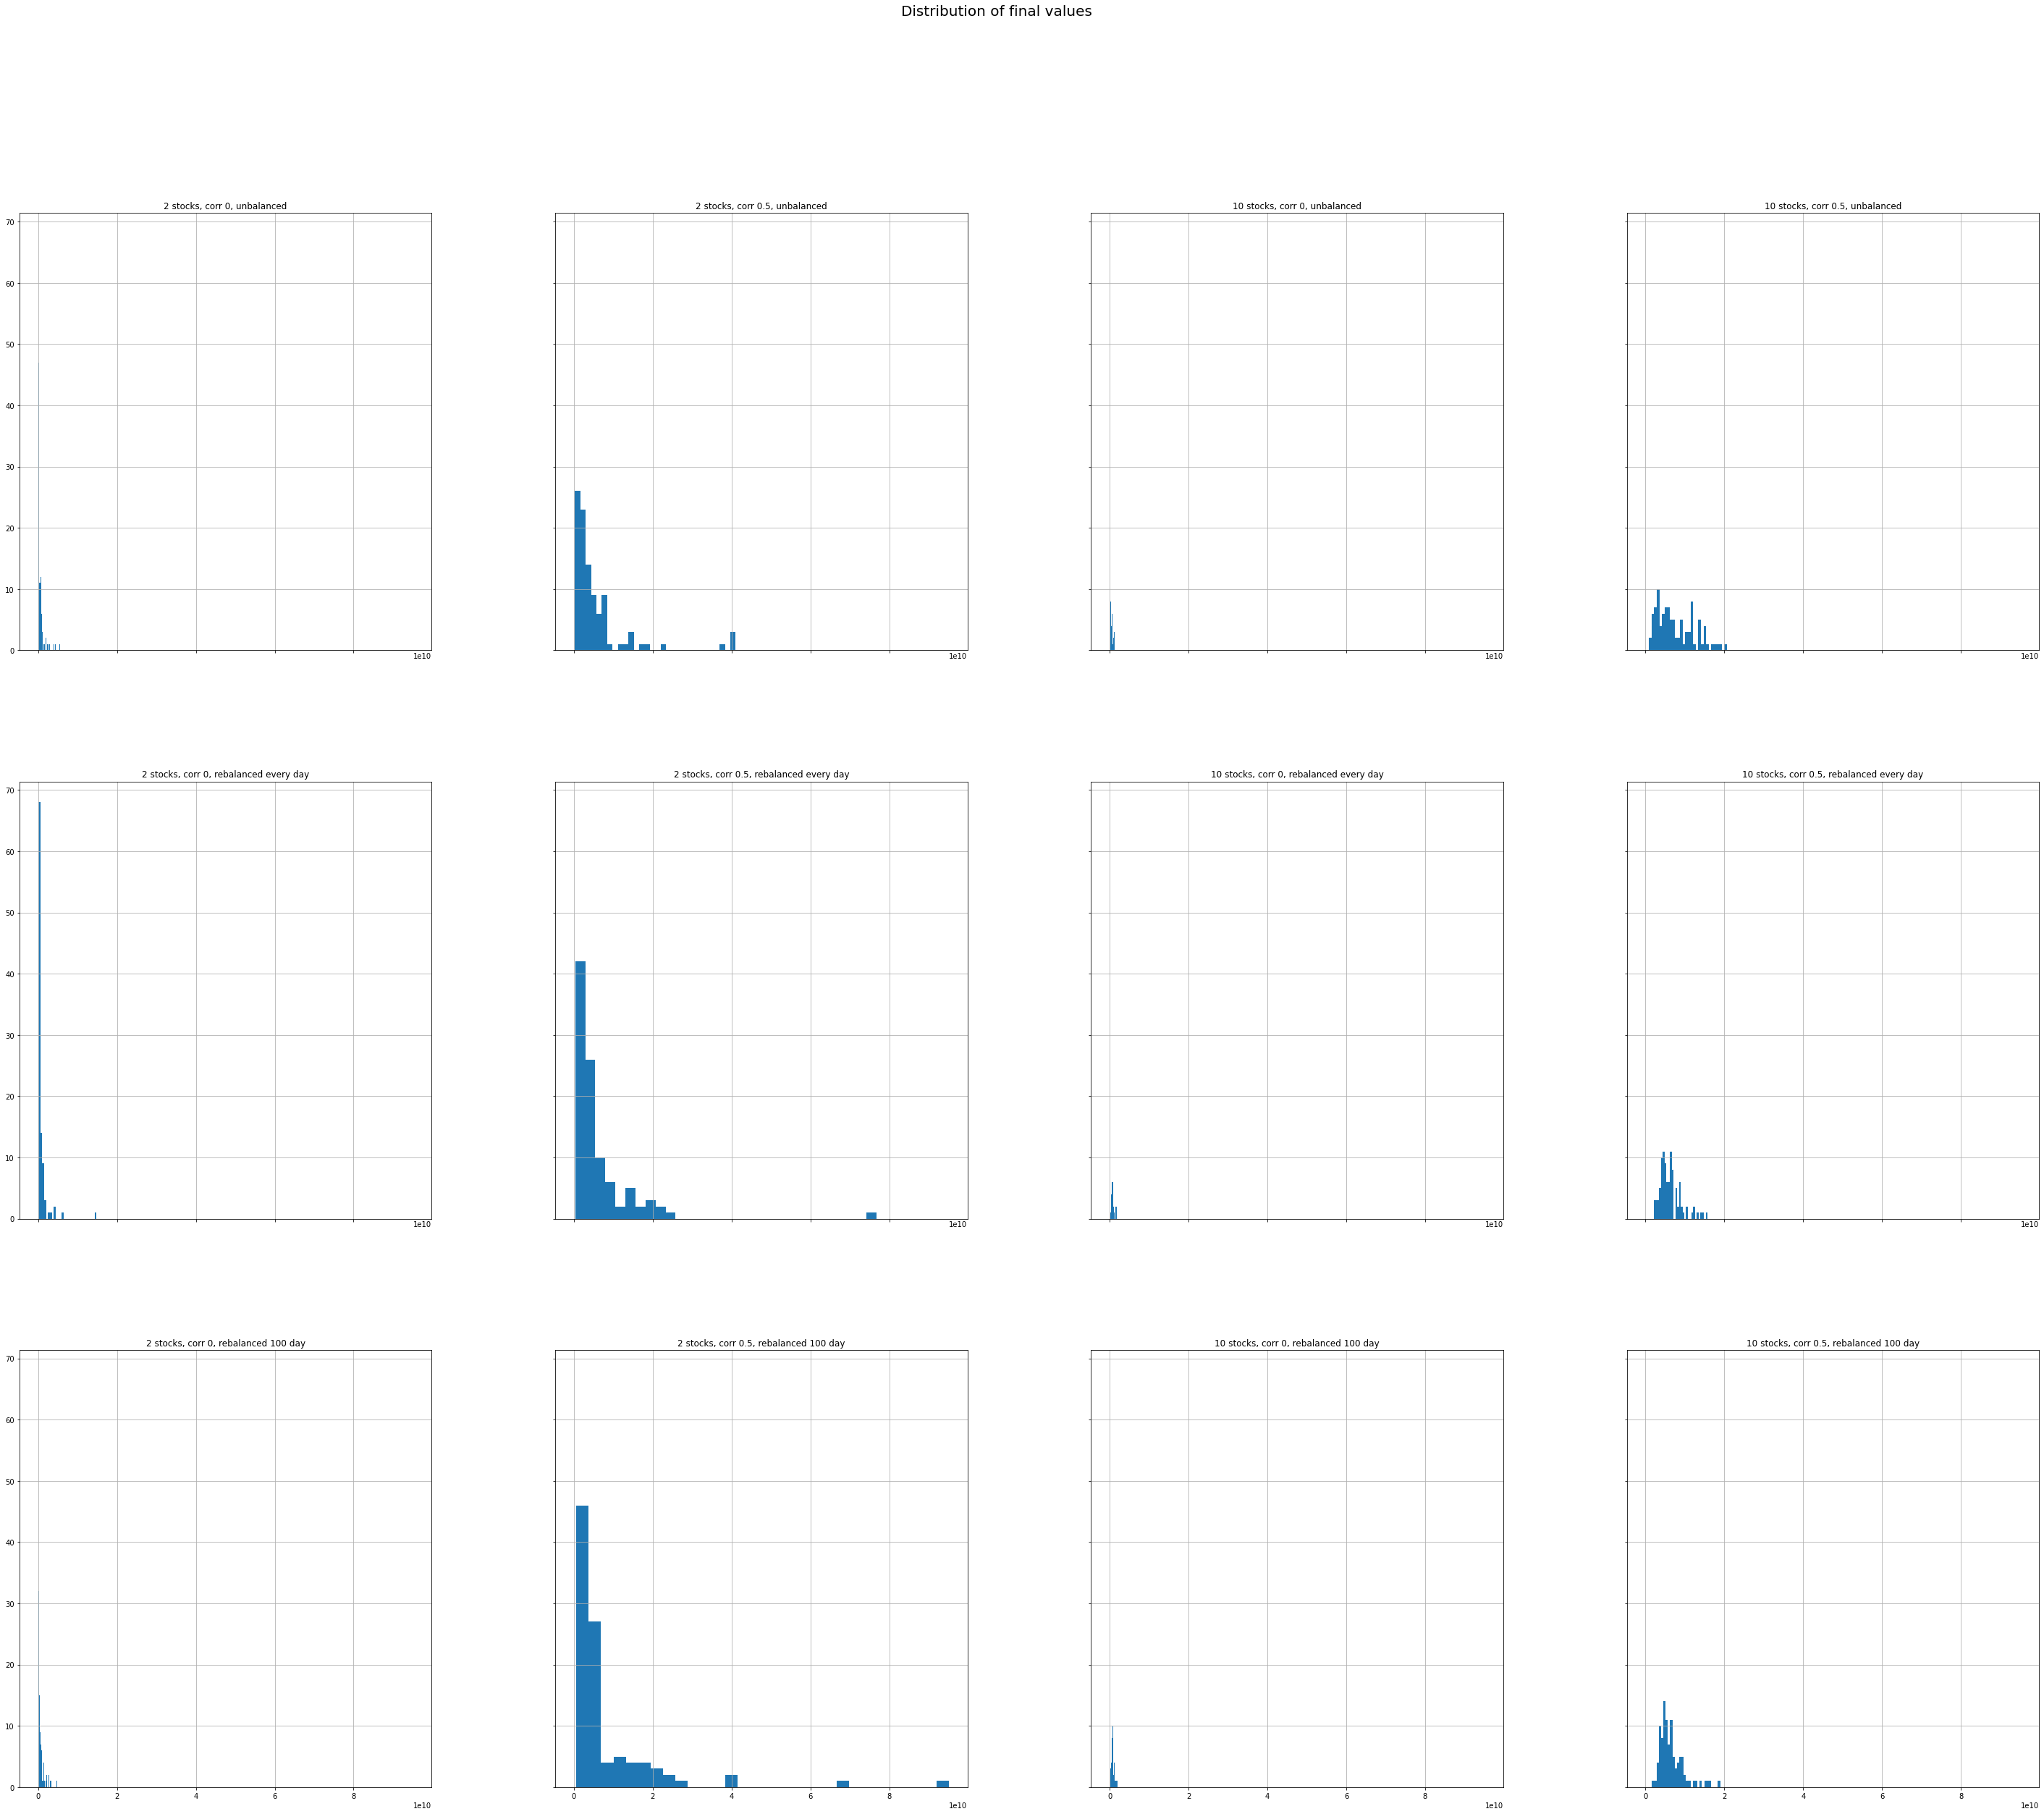

In [11]:
columns=['2 stocks, corr 0, unbalanced','2 stocks, corr 0.5, unbalanced','10 stocks, corr 0, unbalanced','10 stocks, corr 0.5, unbalanced','2 stocks, corr 0, rebalanced every day','2 stocks, corr 0.5, rebalanced every day','10 stocks, corr 0, rebalanced every day','10 stocks, corr 0.5, rebalanced every day','2 stocks, corr 0, rebalanced 100 day','2 stocks, corr 0.5, rebalanced 100 day','10 stocks, corr 0, rebalanced 100 day','10 stocks, corr 0.5, rebalanced 100 day']
df = pd.DataFrame(final_values_pf, index=columns)
df_3=df.transpose()
df_3.hist(columns,bins=30,figsize=(50,40),layout=(3,4),sharex=True, sharey=True)
# if you take away sharx and sharey, the values are better visible, but the scales don´t match anymore
plt.suptitle('Distribution of final values', fontsize=20)

Ungraded non-programming question: In which circumstances does rebalancing pay off? What are advantages and disadvantags to rebalancing?